In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df.index.freq='MS'

In [35]:

df=df.dropna()
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [36]:
#train Test
df_train=df.iloc[:109]
df_test=df.iloc[108:]

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
fitted_model=ExponentialSmoothing(df_train['Thousands of Passengers'],
                                  trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [40]:
test_predictions=fitted_model.forecast(36)

In [41]:
df_test

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


In [43]:
test_predictions

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
1958-07-01    521.801193
1958-08-01    514.525372
1958-09-01    446.222776
1958-10-01    385.432121
1958-11-01    339.645926
1958-12-01    381.452236
1959-01-01    401.211186
1959-02-01    387.157129
1959-03-01    455.808535
1959-04-01    450.043490
1959-05-01    459.534631
1959-06-01    540.121064
1959-07-01    595.679687
1959-08-01    587.373728
1959-09-01    509.400604
1959-10-01    440.002990
1959-11-01    387.734221
1959-12-01    435.459618
1960-01-01    458.016112
1960-02-01    441.972230
1960-03-01    520.343550
1960-04-01    513.762270
1960-05-01    524.597200
1960-06-01    616.593351
1960-07-01    680.018164
1960-08-01    670.536218
1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

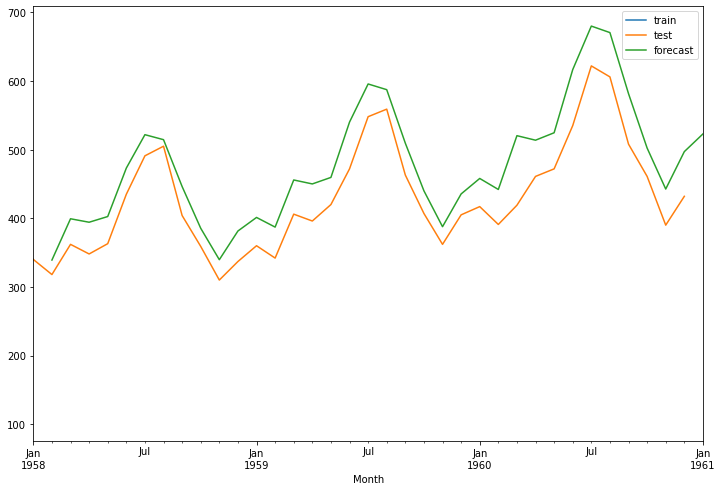

In [44]:
#plotting
df_train['Thousands of Passengers'].plot(legend=True,label='train',figsize=(12,8))
df_test['Thousands of Passengers'].plot(legend=True,label='test')
test_predictions.plot(legend=True,label='forecast',xlim=['1958-01-01','1961-01-01']);

 #### Evaluation

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#MAE
print(mean_absolute_error(df_test,test_predictions))
#MSE
print(mean_squared_error(df_test,test_predictions))
#RMSE
print(np.sqrt(mean_squared_error(df_test,test_predictions)))

63.03138491847624
5614.4207149269
74.92943823976594


In [49]:
df_test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [50]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [51]:
forecast=final_model.forecast(36)

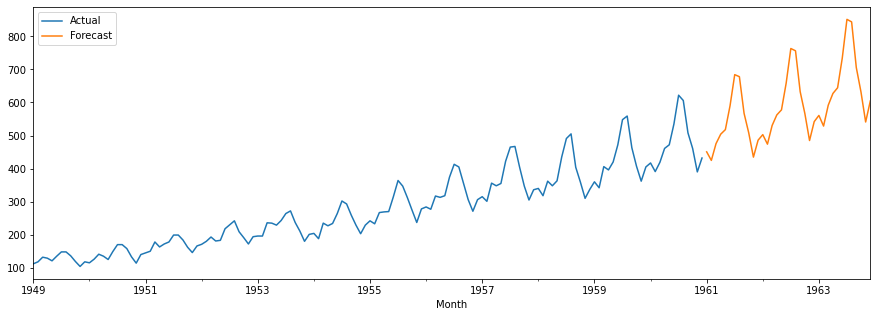

In [55]:
#plotting
df['Thousands of Passengers'].plot(legend=True,label='Actual',figsize=(15,5))
forecast.plot(legend=True,label='Forecast')